### Excercise 3: Sampling from continuous distributions

#### 1. Generate simulated values from the following distributions and verify the results by comparing histograms with analytical results and perform tests for distribution type.

For each distribution we will apply the $\textbf{Kolmogorov-Smirnov test}$ which tells us if a sample $F_{n}(x)$ comes from a specific distribution $F(x)$. We do this by plotting the empirical distribution function with the CDF of the uniform distribution, and then computing

$$
D_{n} = \operatorname*{sup}_x \{ F_{n}(x) - F(x) \}
$$

We compare the distribution $F(x)$ and $F_{n}(x)$ using the adjusted test statistic (which depends based on the distribution we are sampling from).

Which will give us the test statistic which follows the Kolmogorovs distribution. We then compare using some known critical values from the Kolmogorovs distribution (we use a significance level of 0.950). 


#### (a) Exponential distribution

We have $U$ that is uniformly distributed.

$$
X = - \frac{1}{\lambda} \log{ U } \sim \exp{\lambda}
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# No. of samples
n = 10000   

# Probability parameter
beta = 1.0

# Generate U ~ Uniform(0,1)
#U = np.random.rand(n_samples)

# simulates samples from an Exponential distribution (inverse transform method)
#exp_samples = -np.log( np.random.rand(n) ) / beta
exp_samples = -np.log( np.random.sample(n) ) / beta



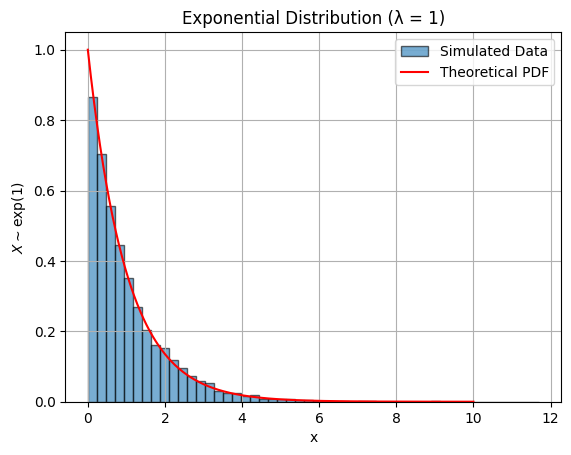

In [7]:
# Plot exponential distribution
x = np.linspace(0, 10, 500) # generate x values
exp = np.exp(-x) # theoretical exponential PDF

classes=50

plt.hist(exp_samples, bins=classes, density=True, alpha=0.6, label='Simulated Data', edgecolor='black') #Histogram of simulated samples
plt.plot(x, exp, 'r-', label='Theoretical PDF') # theoretical exponential PDF
plt.title("Exponential Distribution (λ = 1)")
plt.xlabel("x")
plt.ylabel(r'$X \sim \exp(1)$')
plt.legend()
plt.grid(True)
plt.show()

#### Kolmogorovs-Smirnov test - Exponential distribution

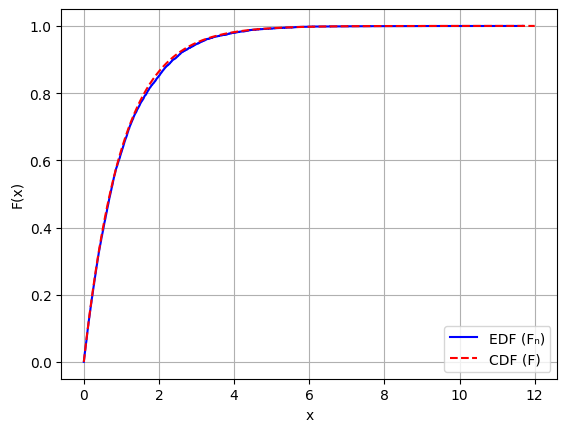

In [8]:
# Kolmogorov-Smirnov test for Exponential distribution

# sort samples
sample_exp_sorted = np.sort(exp_samples)  
edf = np.arange(1, len(exp_samples) + 1) / len(exp_samples)

# Plot EDF
plt.step(sample_exp_sorted, edf, where='post', label='EDF (Fₙ)', color='blue')

# PLot the CDF of the exponential distribution
x_values = np.linspace(0, 12, len(exp_samples))
cdf = 1 - np.exp(-x_values)
plt.plot(x_values, cdf, label='CDF (F)', color='red', linestyle='--')
#plt.title("Kolmogorov-Smirnov Test Visualization")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Compute test statistic
D_n = np.max( np.abs( edf - cdf ) )
 
print(f"The test statistic is: {D_n:.4f}") # 0.7095

print("For significance level of 0.950 we have the critical value as 1.094.")


The test statistic is: 0.7095
For significance level of 0.950 we have the critical value as 1.094.


#### (b) Normal distribution (Box-Mueller transform)

In [10]:
# No. of samples
n = 1000

# Obtain the two independent uniform random numbers
U1 = np.random.uniform(0, 1, n)
U2 = np.random.uniform(0, 1, n)

# Compute Z_1 and Z_2
Z1 = np.sqrt( -2 * np.log(U1) ) * np.cos( 2 * np.pi * U2 )
Z2 = np.sqrt( -2 * np.log(U1) ) * np.sin( 2 * np.pi * U2 )



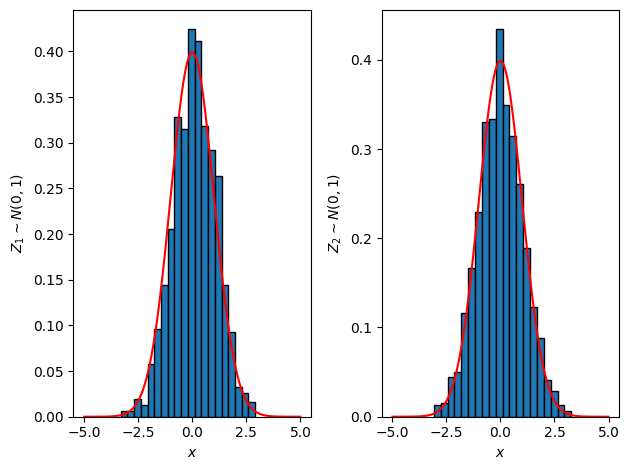

In [11]:
# Plot normal distribution
x = np.linspace(-5, 5, 1000)
normal = 1 / ( np.sqrt( 2 * np.pi ) ) * np.exp(-0.5 * (x)**2)

# OR Builtin probability density function (PDF) of the standard normal distribution
#from scipy.stats import norm
#pdf = norm.pdf(x, loc=0, scale=1)


# Histogram
classes = 20

# Plotting
plt.subplots(1,2)

plt.subplot(1,2,1)
plt.hist(Z1, bins=classes, density=True, edgecolor='black')
plt.plot(x, normal, 'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$Z_{1} \sim N(0,1)$')

plt.subplot(1,2,2)
plt.hist(Z2, bins=classes, density=True, edgecolor='black')
plt.plot(x, normal, 'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$Z_{2} \sim N(0,1)$')

plt.tight_layout()
plt.show()


#### Kolmogorovs-Smirnov test - Normal distribution

In [12]:
from scipy.stats import norm

In [13]:
# Kolmogorov-Smirnov test - Normal distribution

# Sort samples
Z1_sorted = np.sort(Z_1)
Z2_sorted = np.sort(Z_2)
edf = np.arange(1, len(Z1_sorted)+1) / len(Z1_sorted)

# Plot the EDF
plt.step(Z1_sorted, edf, where='post', alpha=0.7)
plt.step(Z2_sorted, edf, where='post', alpha=0.7)

# PLot the CDF of the normal distribution
xx = np.linspace(-5, 5, len(Z1_sorted))
cdf = norm.cdf(x, 0, 1)
plt.plot(xx, cdf, '--r', alpha=0.7)
plt.xlabel(r'$x$')
plt.ylabel(r'$F(x)$')
plt.legend([r'EDF $(Z_{1})$', r'EDF $(Z_{2})$', 'CDF'])
plt.grid()
plt.show()


NameError: name 'Z_1' is not defined

In [ ]:
# test statistic
D_n = np.max( np.abs( edf - cdf ) )
print(f"The test statistic is: {D_n:.4f}") # The test statistic is: 0.2862

print("For significance level of 0.950 we have the critical value as 0.895.")


The test statistic is: 0.2862
For significance level of 0.950 we have the critical value as 0.895.


In [ ]:
from scipy.stats import kstest

D1, p1 = kstest(Z_1, 'norm')
D2, p2 = kstest(Z_2, 'norm')

print("Z1: KS statistic =", D1, "| p-value =", p1)
print("Z2: KS statistic =", D2, "| p-value =", p2)


Z1: KS statistic = 0.025707997460471754 | p-value = 0.5148826959972698
Z2: KS statistic = 0.024971835592519698 | p-value = 0.5524855474038284


#### (c) Pareto distribution, with $\beta = 1$ and experiment with different values of $k$ values: $k=2.05$, $k=2.5$, $k=3$ and $k=4$.

As usual $U$ is uniformly distributed.

$$
X = \beta \left( U^{-\frac{1}{k}} \right) \hspace{0.3cm} , \hspace{0.3cm} x \geq \beta
$$

In [ ]:
# No. of samples
n = 1000

# parameters
beta = 1
k = np.array([2.05, 2.5, 3, 4])

# Initialize vector to store samples
samples_pareto = np.zeros((n, len(k)))

# Define U
U = np.random.uniform(0, 1, n)

# Pareto distribution samples generator 
for i in range(len(k)):
    samples = beta * ( U ) ** (-1/k[i])
    samples_pareto[:,i] = samples

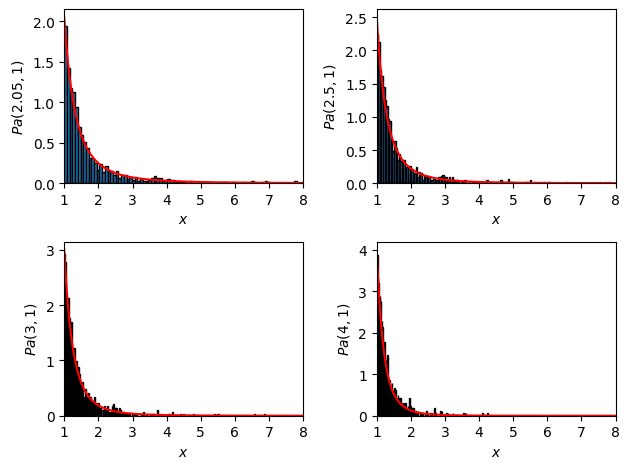

In [ ]:
# Plot Pareto distribution
x = np.linspace(1, 8, 1000)
pareto = np.zeros((len(x),len(k)))
for i in range(len(k)):
    p = k[i] * beta**(k[i]) / x**(k[i]+1)
    pareto[:,i] = p
    
# Define no. of bins/classes
classes = 200

# Plotting
plt.subplots(2,2)

plt.subplot(2,2,1)
plt.hist(samples_pareto[:,0], bins=classes, density=True, edgecolor='black')
plt.plot(x, pareto[:,0], '-r')
plt.xlim(1,8)
plt.xticks(np.arange(1, 9))
plt.xlabel(r'$x$')
plt.ylabel(r'$Pa(2.05,1)$')

plt.subplot(2,2,2)
plt.hist(samples_pareto[:,1], bins=classes, density=True, edgecolor='black')
plt.plot(x, pareto[:,1], '-r')
plt.xlim(1,8)
plt.xticks(np.arange(1, 9))
plt.xlabel(r'$x$')
plt.ylabel(r'$Pa(2.5,1)$')

plt.subplot(2,2,3)
plt.hist(samples_pareto[:,2], bins=classes, density=True, edgecolor='black')
plt.plot(x, pareto[:,2], '-r')
plt.xlim(1,8)
plt.xticks(np.arange(1, 9))
plt.xlabel(r'$x$')
plt.ylabel(r'$Pa(3,1)$')

plt.subplot(2,2,4)
plt.hist(samples_pareto[:,3], bins=classes, density=True, edgecolor='black')
plt.plot(x, pareto[:,3], '-r')
plt.xlim(1,8)
plt.xticks(np.arange(1, 9))
plt.xlabel(r'$x$')
plt.ylabel(r'$Pa(4,1)$')

plt.tight_layout()
plt.show()


#### K-S test for pareto dist.

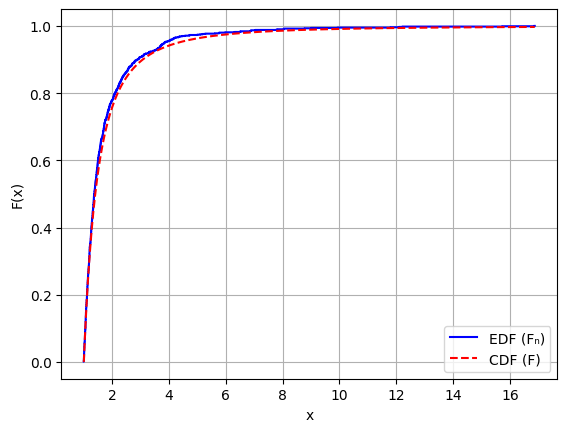

In [ ]:
# Kolmogorov-Smirnov test for Pareto distribution

# sort samples
sample_pareto_sorted = np.sort(samples_pareto[:,0])  
edf = np.arange(1, len(samples_pareto[:,0]) + 1) / len(samples_pareto[:,0])

# Plot EDF
plt.step(sample_pareto_sorted, edf, where='post', label='EDF (Fₙ)', color='blue')

# PLot the CDF of the pareto distribution
x = np.linspace(1, np.max(sample_pareto_sorted), len(samples_pareto[:,0]))
# x = np.linspace(1, np.max(sample_pareto_sorted), n)
cdf = 1 - ( beta / x )**(k[0])
plt.plot(x, cdf, label='CDF (F)', color='red', linestyle='--')
#plt.title("Kolmogorov-Smirnov Test Visualization")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Sort samples
samples_pareto_sorted = np.zeros(np.shape(samples_pareto))
for i in range(samples_pareto.shape[1]):
    samples_pareto_sorted[:,i] = np.sort(samples_pareto[:,i])

# Compute EDF
edf = np.arange(1, len(samples_pareto[:,0])+1) / len(samples_pareto[:,0])

# Get the CDF of the exponential distribution
cdf = np.zeros(np.shape(samples_pareto))
for i in range(samples_pareto.shape[1]):
    xx = np.linspace(1, np.max(samples_pareto_sorted[:,i]), len(samples_pareto[:,0]))
    cdf[:,i] = 1 - ( beta / xx )**(k[i])

# Compute test statistic

# k = 2.05
D_n_1 = np.max( np.abs( edf - cdf[:,0] ) )
print(f"The test statistic for k=2.05, beta=1 is: {D_n_1:.4f}") #  0.7685

# k = 2.5
D_n_1 = np.max( np.abs( edf - cdf[:,1] ) )
print(f"The test statistic for k=2.5, beta=1 is: {D_n_1:.4f}") # 0.7342

# k = 2.05
D_n_1 = np.max( np.abs( edf - cdf[:,2] ) )
print(f"The test statistic for k=3, beta=1 is: {D_n_1:.4f}") # 0.7050

# k = 2.05
D_n_1 = np.max( np.abs( edf - cdf[:,3] ) )
print(f"The test statistic for k=4, beta=1 is: {D_n_1:.4f}") # 0.6648

print("For significance level of 0.950 we have the critical value as 1.358.") # critical value as 1.358


The test statistic for k=2.05, beta=1 is: 0.7685
The test statistic for k=2.5, beta=1 is: 0.7342
The test statistic for k=3, beta=1 is: 0.7050
The test statistic for k=4, beta=1 is: 0.6648
For significance level of 0.950 we have the critical value as 1.358.


#### 2. For the Pareto distribution with support on $[\beta, \infty[$ compare mean value and variance, with analytical results, which can be calculated as 

$$
\mathrm{E}(x) = \beta \frac{k}{k-1} \hspace{0.3cm} \mathrm{for} \hspace{0.3cm} k>1 \hspace{0.3cm} \mathrm{and} \hspace{0.3cm} \mathrm{Var}(x) = \beta^2 \frac{k}{(k-1)^2 (k-2)} \hspace{0.3cm} \mathrm{for} \hspace{0.3cm} k>2
$$

#### Explain problems if any.

In [ ]:
# Function that generates n samples from Pareto distribution
def pareto(beta, k, n):
    # Define U
    U = np.random.uniform(0, 1, n)

    # Obtain samples from Pareto distribution 
    samples = beta * ( U ) ** (-1/k)
    
    return samples

In [ ]:
# No. of generated samples & beta
n = 100000
beta = 1

# Different k-values
k = np.array([2.05, 2.5, 3, 4])

# Initialize vector to store samples
samples_pareto = np.zeros((n, len(k)))

for i in range(len(k)):
    samples = pareto(beta, k[i], n)
    samples_pareto[:,i] = samples
    
# Take the mean and variance of every column
column_means = np.mean(samples_pareto, axis=0)
column_vars = np.var(samples_pareto, axis=0)

# Find the analytic mean and variance of every column
expected = np.zeros(len(k))
variances = np.zeros(len(k))

for i in range(len(k)):
    # Compute and store analytic mean
    exp_i = ( beta * k[i] ) / ( k[i] - 1 )
    expected[i] = exp_i
    
    # Compute and store analytic variance
    var_i = ( beta**2 * k[i] ) / ( ( k[i] - 1 )**2 * ( k[i] - 2 ) )
    variances[i] = var_i
    print(" ")
    print(f'Testing with beta = {beta}, k = {k[i]}')
    print(f'Theorectical mean = {exp_i:.4f}')
    print(f'Simulated mean = {column_means[i]:.4f}')
    print(f'Theorectical variance = {var_i:.4f}')
    print(f'Simulated variance = {column_vars[i]:.4f}')
    print(" ")
    print('-------------------------------------------------')

 
Testing with beta = 1, k = 2.05
Theorectical mean = 1.9524
Simulated mean = 1.9638
Theorectical variance = 37.1882
Simulated variance = 19.4431
 
-------------------------------------------------
 
Testing with beta = 1, k = 2.5
Theorectical mean = 1.6667
Simulated mean = 1.6670
Theorectical variance = 2.2222
Simulated variance = 1.6459
 
-------------------------------------------------
 
Testing with beta = 1, k = 3.0
Theorectical mean = 1.5000
Simulated mean = 1.5025
Theorectical variance = 0.7500
Simulated variance = 0.9049
 
-------------------------------------------------
 
Testing with beta = 1, k = 4.0
Theorectical mean = 1.3333
Simulated mean = 1.3316
Theorectical variance = 0.2222
Simulated variance = 0.2154
 
-------------------------------------------------


#### 3. For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.

In [17]:
from scipy.stats import t

In [18]:
# Obtain t
alpha = 0.05 #significance level 5% , so we're constructing a 95% confidence interval (CI)
df = n-1 #degrees of freedom
t_value = t.ppf( 1 - alpha/2, df )

# Obtain samples
mu = 0
std = 1
n = 10 # sample size
m = 100 # no. of repeated experiments
samples = np.zeros((n,m))

# Generates samples from standard normal distribution
for i in range(m):
    samples_i = np.random.normal(mu, std, n) 
    samples[:,i] = samples_i


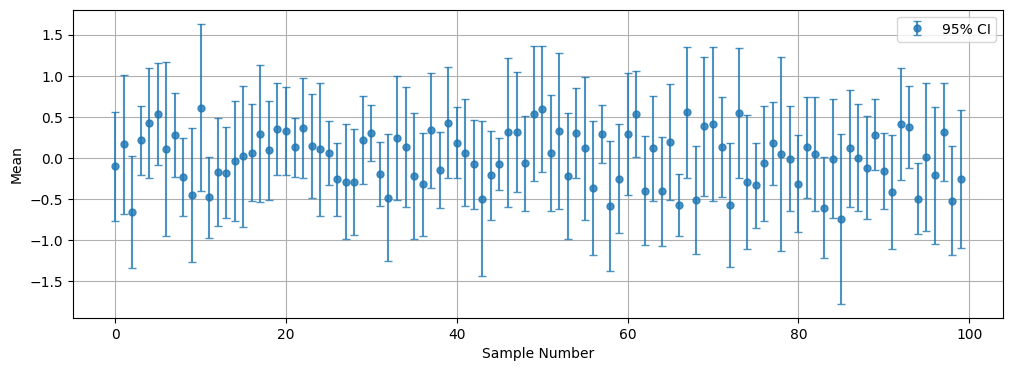

In [19]:
# Compute sample means and standard deviations
s = np.std(samples, axis=0)
xbar = np.mean(samples, axis=0)

# Compute lower and upper bounds
lower_mean = xbar - t_value * s / np.sqrt(n)
upper_mean = xbar + t_value * s / np.sqrt(n)

# Plot means with error bars representing CIs
plt.subplots(1,1, figsize=(12,4))
plt.grid()
plt.errorbar(np.arange(len(xbar)), xbar, yerr=[xbar - lower_mean, upper_mean - xbar],
             fmt='o', markersize=5, capsize=3, alpha=0.8)
plt.xlabel('Sample Number')
plt.ylabel('Mean')
plt.legend(['95% CI'])

plt.show()


In [20]:
from scipy.stats import chi2

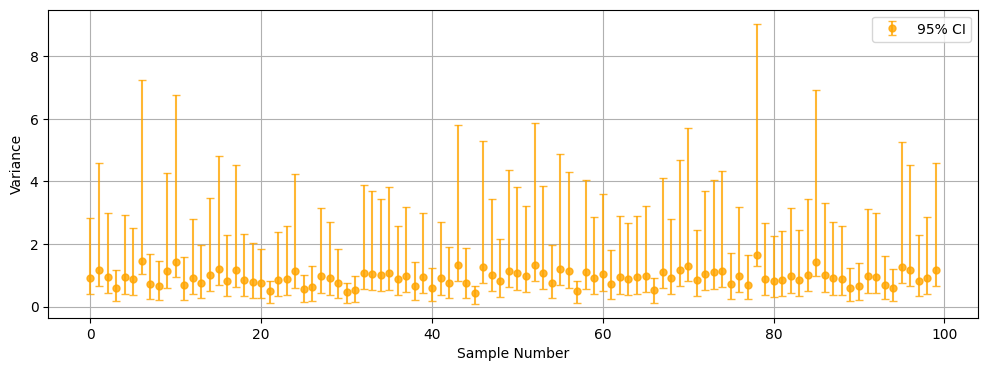

In [21]:
# Obtain chi^2 quantiles
chi_lower = chi2.ppf( 1 - alpha/2, df )
chi_upper = chi2.ppf( alpha/2, df )

# Compute lower and upper bounds
lower_var = ( n - 1 ) * s**2 / chi_lower
upper_var = ( n - 1 ) * s**2 / chi_upper

# Plot variances with error bars representing CIs
plt.subplots(1,1, figsize=(12,4))
plt.grid()
plt.errorbar(np.arange(len(s)), s, yerr=[s - lower_var, upper_var - s],
             fmt='o', markersize=5, capsize=3, alpha=0.8, color='orange')
plt.xlabel('Sample Number')
plt.ylabel('Variance')
plt.legend(['95% CI'])

plt.show()


In [ ]:
# Check how many times 0 occurs (mean)
counter_include_zero = 0

for i in range(len(lower_mean)):
    if lower_mean[i] <= 0 and upper_mean[i] >= 0:
        counter_include_zero += 1
        
# Check how many times 1 occurs (variance)
counter_include_one = 0

for i in range(len(lower_var)):
    if lower_var[i] <= 1 and upper_var[i] >= 1:
        counter_include_one += 1

print(f"The number of times that 0 is in the CI for the mean is: {counter_include_zero} out of 100 CI's of the mean.")
# The number of times that 0 is in the CI for the mean is: 97 out of 100 CI's of the mean.
print(f"The number of times that 1 is in the CI for the variance is: {counter_include_one} out of 100 CI's of the variance.")
# The number of times that 1 is in the CI for the variance is: 92 out of 100 CI's of the variance.

The number of times that 0 is in the CI for the mean is: 97 out of 100 CI's of the mean.
The number of times that 1 is in the CI for the variance is: 92 out of 100 CI's of the variance.


#### 4. Simulate from the Pareto distribution using composition

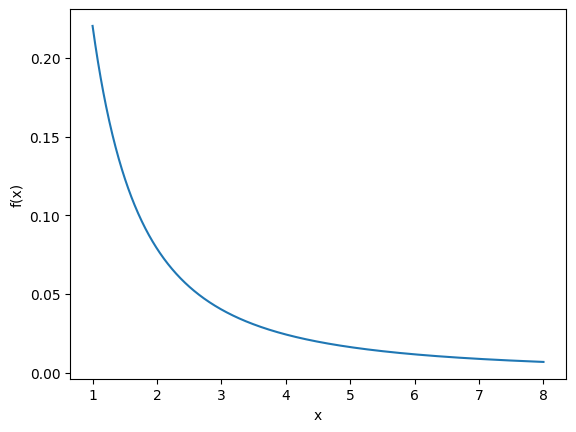

In [23]:
# Generate samples from Pareto distribution - composition
n = 1000
U = np.random.uniform(0,1,n)
mu = np.mean(U)
x = np.linspace(1,8,n)
fx = mu / ( mu + x )**2

# Plotting
plt.plot(x, fx)
plt.xlabel(r'x')
plt.ylabel(r'f(x)')

plt.show()
